<a href="https://colab.research.google.com/github/pkuSapphire/CreditRiskManagement/blob/main/AUC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data Overview:
    IDRSSD  default     nonII     nonIE     assets  acl_to_loans
0   991340        0  0.020782  0.032350  3486828.0      0.024985
1   282208        0  0.016008  0.033008   770108.0      0.014395
2     5210        0  0.005255  0.022269   627541.0      0.010375
3   774730        0  0.002345  0.023794   497558.0      0.012406
4  2079493        0  0.006459  0.032323   613746.0      0.008371

Data Description:
             IDRSSD       default         nonII         nonIE        assets  \
count  1.758500e+04  17585.000000  17585.000000  17585.000000  1.758500e+04   
mean   9.262149e+05      0.006881      0.009584      0.028229  1.657834e+07   
std    9.255860e+05      0.082667      0.012294      0.012769  1.529921e+08   
min    5.050000e+02      0.000000     -0.085570      0.000304  3.278460e+05   
25%    3.201190e+05      0.000000      0.004787      0.022245  5.955540e+05   
50%    6.536480e+05      0.000000      0.007607      0.026881  9.128960e+05   
75%    9.436750e+05    

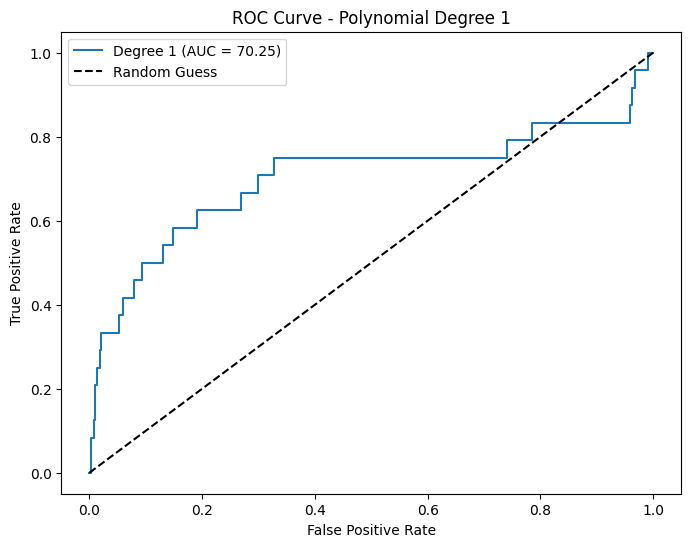


--- Polynomial Degree: 2 ---
Number of Features: 9
Polynomial Features (Degree=2):
['nonIE' 'assets' 'acl_to_loans' 'nonIE^2' 'nonIE assets'
 'nonIE acl_to_loans' 'assets^2' 'assets acl_to_loans' 'acl_to_loans^2']
ROC AUC Score: 80.99
Accuracy: 99.32%
Precision: 0.00%
Recall: 0.00%
F1-Score: 0.00%


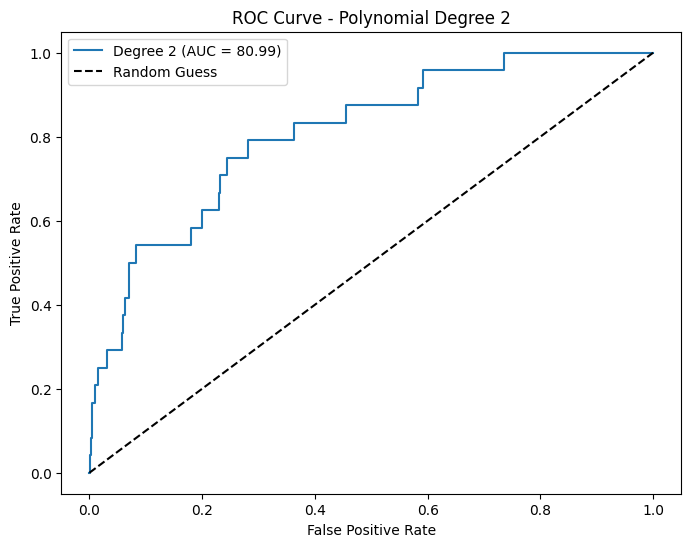


--- Polynomial Degree: 3 ---
Number of Features: 19
Polynomial Features (Degree=3):
['nonIE' 'assets' 'acl_to_loans' 'nonIE^2' 'nonIE assets'
 'nonIE acl_to_loans' 'assets^2' 'assets acl_to_loans' 'acl_to_loans^2'
 'nonIE^3' 'nonIE^2 assets' 'nonIE^2 acl_to_loans' 'nonIE assets^2'
 'nonIE assets acl_to_loans' 'nonIE acl_to_loans^2' 'assets^3'
 'assets^2 acl_to_loans' 'assets acl_to_loans^2' 'acl_to_loans^3']
ROC AUC Score: 79.94
Accuracy: 99.29%
Precision: 0.00%
Recall: 0.00%
F1-Score: 0.00%


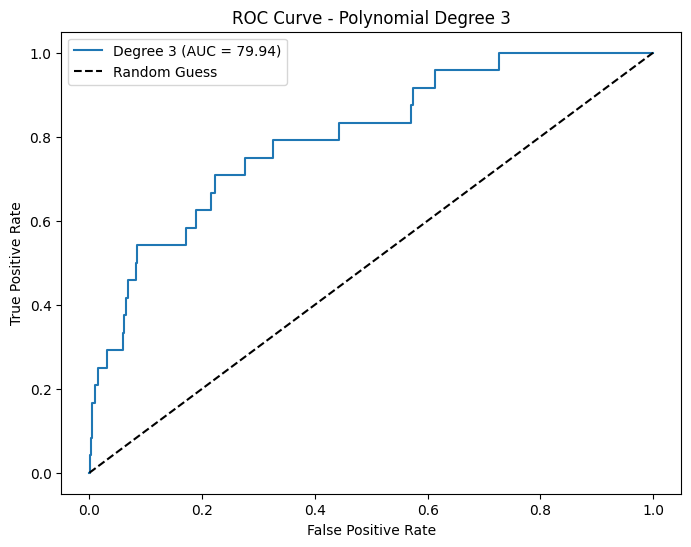


=== Performance Metrics Across Polynomial Degrees ===
   Degree    ROC AUC   Accuracy  Precision  Recall  F1-Score
0       1  70.251217  99.260734        0.0     0.0       0.0
1       2  80.986974  99.317600        0.0     0.0       0.0
2       3  79.938448  99.289167        0.0     0.0       0.0


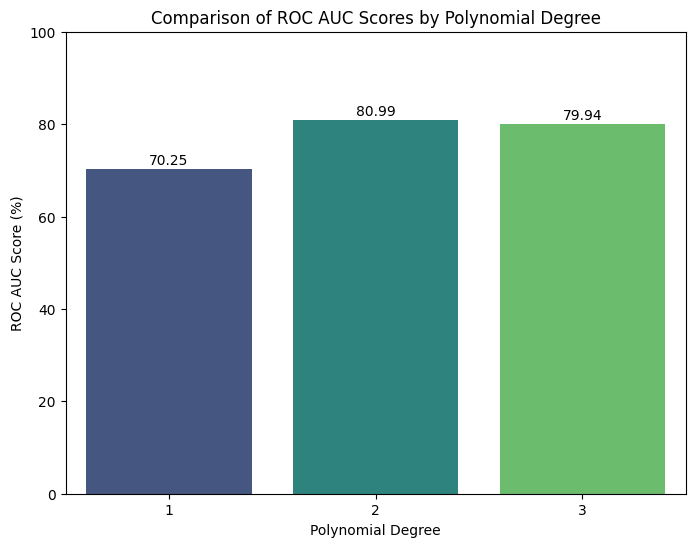


--- Feature Importance for Polynomial Degree 3 ---


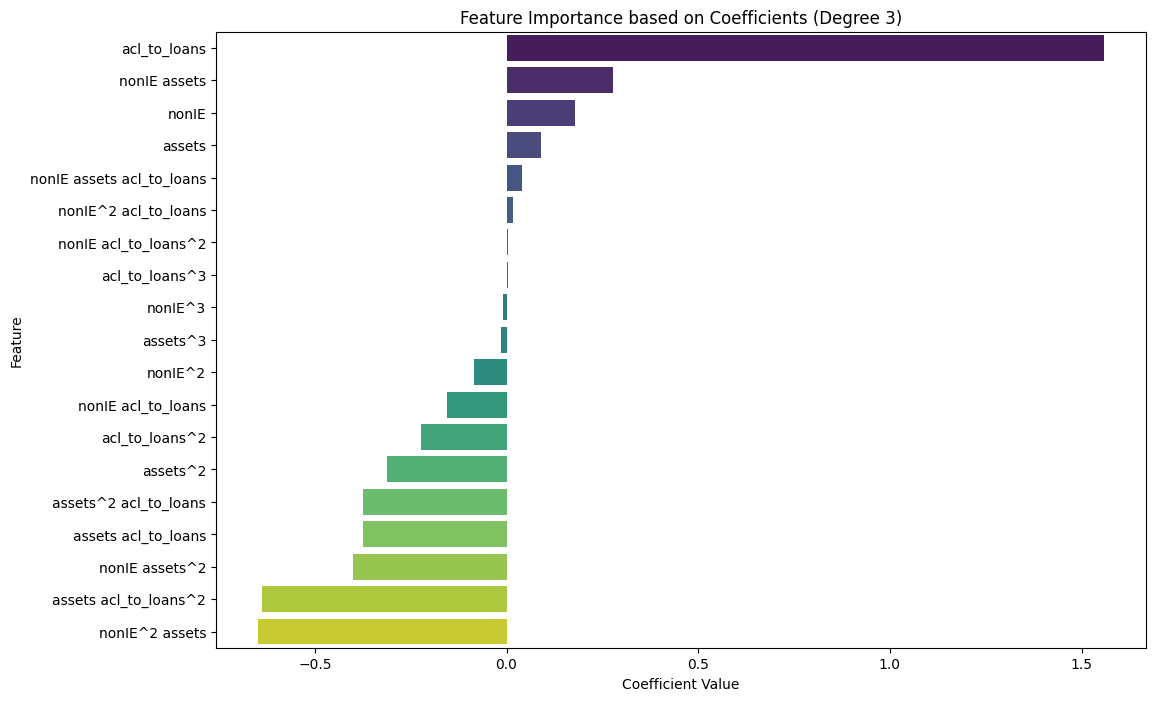

In [4]:
# By Bosen Li (bl3097), Wenyu Luo (wl2905), Edward Zhang (yz4756)

# For this exercise, we will use the same data as was used in In-Class Exercise #2 Download the same data as was used in In-Class Exercise #2but this time we will calculate the area-under-the-ROC-curve (AUC) using the scikit-learn package.
# Load the data using Pandas and read_pickle.
# From sklearn.metrics, import roc_auc_score. (If scikit-learn is not already installed, go to a command prompt window or terminal and enter “conda install scikit-learn”.)
# For each of the variables ['nonII',  'nonIE',  'assets',  'acl_to_loans'], calculate the AUC against the column ‘default’. For example, roc_auc_score(data[‘default’], data[‘nonII’]).
# Comment on which variables appear to be the strongest predictors based on the AUCs.
# Is the variable well populated?
# Can you hypothesize whether each variable is a 'good' or 'bad driver'?  (Something like net income to assets would be expected to be a 'good driver' in that larger values are likely to be indicative of lower credit risk.)
# Is the AUC consistent with the this hypothesis?
# Does the relationship between the variable and default appear to be linear or non-linear?


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    roc_auc_score, accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report, roc_curve
)

# Suppress warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')

# -------------------------------
# 1. Data Loading and Exploration
# -------------------------------

# Load the dataset
data = pd.read_pickle('In-Class Exercise #2.pickle')

# Display the first few rows
print("Data Overview:")
print(data.head())

# Display basic statistics
print("\nData Description:")
print(data.describe())

# Check for missing values
print("\nMissing Values:")
print(data.isna().sum())

# -------------------------------
# 2. Handling Missing Values
# -------------------------------

# Define the features and target
features = ['nonIE', 'assets', 'acl_to_loans']
target = 'default'

# Check missing values in the relevant columns
missing_values = data[features + [target]].isna().sum()
print("\nMissing Values in Features and Target:")
print(missing_values)

# Option 1: Drop rows with missing values in the selected features and target
data_clean = data.dropna(subset=features + [target])

# Alternatively, Option 2: Impute missing values (Uncomment if you prefer imputation)
# from sklearn.impute import SimpleImputer
# imputer = SimpleImputer(strategy='mean')
# data_clean[features] = imputer.fit_transform(data_clean[features])

# Verify that missing values are handled
print("\nMissing Values After Handling:")
print(data_clean[features + [target]].isna().sum())

# -------------------------------
# 3. Feature Engineering and Model Training
# -------------------------------

# Define features (X) and target (y)
X = data_clean[features]
y = data_clean[target]

# Split the data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"\nTraining Samples: {X_train.shape[0]}")
print(f"Testing Samples: {X_test.shape[0]}")

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the degrees to compare
degrees = [1, 2, 3]

# Initialize a list to store performance metrics
performance_metrics_list = []

# Loop through each degree, create polynomial features, train the model, and evaluate
for degree in degrees:
    print(f"\n--- Polynomial Degree: {degree} ---")

    if degree == 1:
        # No polynomial features, use original scaled features
        X_train_poly = X_train_scaled
        X_test_poly = X_test_scaled
        feature_names = features
    else:
        # Create Polynomial Features
        poly = PolynomialFeatures(degree=degree, include_bias=False)
        X_train_poly = poly.fit_transform(X_train_scaled)
        X_test_poly = poly.transform(X_test_scaled)
        feature_names = poly.get_feature_names_out(features)

    # Display the feature names (optional)
    print(f"Number of Features: {X_train_poly.shape[1]}")
    if degree != 1:
        print(f"Polynomial Features (Degree={degree}):")
        print(feature_names)

    # Initialize Logistic Regression
    log_reg = LogisticRegression(max_iter=1000, solver='liblinear')  # 'liblinear' supports small datasets

    # Train the model on polynomial features
    log_reg.fit(X_train_poly, y_train)

    # Predictions on the test set
    y_pred = log_reg.predict(X_test_poly)
    y_proba = log_reg.predict_proba(X_test_poly)[:, 1]

    # Calculate Evaluation Metrics
    auc = roc_auc_score(y_test, y_proba) * 100
    accuracy = accuracy_score(y_test, y_pred) * 100
    precision = precision_score(y_test, y_pred) * 100
    recall = recall_score(y_test, y_pred) * 100
    f1 = f1_score(y_test, y_pred) * 100

    print(f"ROC AUC Score: {auc:.2f}")
    print(f"Accuracy: {accuracy:.2f}%")
    print(f"Precision: {precision:.2f}%")
    print(f"Recall: {recall:.2f}%")
    print(f"F1-Score: {f1:.2f}%")

    # Store the metrics in a dictionary and append to the list
    performance_metrics_list.append({
        'Degree': degree,
        'ROC AUC': auc,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1
    })

    # Optional: Plot ROC Curve for each degree
    fpr, tpr, thresholds = roc_curve(y_test, y_proba)
    plt.figure(figsize=(8,6))
    plt.plot(fpr, tpr, label=f'Degree {degree} (AUC = {auc:.2f})')
    plt.plot([0,1], [0,1], 'k--', label='Random Guess')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - Polynomial Degree {degree}')
    plt.legend()
    plt.show()

# -------------------------------
# 4. Comparing AUC Scores Across Degrees
# -------------------------------

# Convert the list of dictionaries to a DataFrame
performance_metrics = pd.DataFrame(performance_metrics_list)

# Display the performance metrics table
print("\n=== Performance Metrics Across Polynomial Degrees ===")
print(performance_metrics)

# Plot AUC Scores Comparison
plt.figure(figsize=(8,6))
sns.barplot(x='Degree', y='ROC AUC', data=performance_metrics, palette='viridis')
plt.title('Comparison of ROC AUC Scores by Polynomial Degree')
plt.xlabel('Polynomial Degree')
plt.ylabel('ROC AUC Score (%)')
plt.ylim(0, 100)
for index, row in performance_metrics.iterrows():
    plt.text(index, row['ROC AUC'] + 1, f"{row['ROC AUC']:.2f}", ha='center')
plt.show()

# -------------------------------
# 5. Additional Analysis (Optional)
# -------------------------------

# Feature Importance for Degree 3 (as an example)
degree_to_inspect = 3
print(f"\n--- Feature Importance for Polynomial Degree {degree_to_inspect} ---")

# Create Polynomial Features for degree_to_inspect
poly_inspect = PolynomialFeatures(degree=degree_to_inspect, include_bias=False)
X_train_poly_inspect = poly_inspect.fit_transform(X_train_scaled)
feature_names_inspect = poly_inspect.get_feature_names_out(features)

# Train Logistic Regression
log_reg_inspect = LogisticRegression(max_iter=1000, solver='liblinear')
log_reg_inspect.fit(X_train_poly_inspect, y_train)

# Get coefficients
coefficients = log_reg_inspect.coef_[0]
feature_importance = pd.Series(coefficients, index=feature_names_inspect)
feature_importance = feature_importance.sort_values(ascending=False)

# Plot Feature Importance
plt.figure(figsize=(12,8))
sns.barplot(x=feature_importance.values, y=feature_importance.index, palette='viridis')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Feature Importance based on Coefficients (Degree 3)')
plt.show()

# -------------------------------
# End of Enhanced Script
# -------------------------------
